# 1번 문제 EDA 

1. 결측치를 확인하고, 결측치 제거하세요. 
2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타내세요. 
3. 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하세요. 


###  예제 데이터 설명 

## 고객 정보 데이터 
* ID: 고객의 고유 식별자
* Year_Birth: 고객의 출생 연도
* Marital_Status: 고객의 결혼 여부
* Income: 고객의 연간 가계 소득
* Kidhome: 고객 가구의 어린이 수
* Teenhome: 고객 가구의 청소년 수

## Products 
* MntWines: 지난 2년 동안 와인에 소비한 금액
* MntFruits: 지난 2년 동안 과일에 소비한 금액
* MntMeatProducts: 지난 2년 동안 육류에 소비된 금액
* MntFishProducts: 지난 2년 동안 생선에 소비한 금액
* MntSweetProducts: 지난 2년간 사탕에 소비한 금액

## Place 
* NumWebPurchases: 회사 웹사이트를 통해 이루어진 구매 수
* NumCatalogPurchases: 카탈로그를 사용하여 이루어진 구매 수
* NumStorePurchases: 매장에서 직접 구매한 횟수
* NumWebVisitsMonth: 지난 달 회사 웹 사이트 방문 횟수



In [45]:
#1번 답안 작성 시작! 
import pandas as pd 
import numpy as np 
data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem1.csv")

## 1. 결측치가 있느나 결측치가 전체적으로 많이 있는 것이 아닌, Income 에만 소수(24개)만 존재하여 평균으로 보간 하겠습니다. 

In [46]:
from scipy.stats import zscore
num_cols = data.columns.difference(['Marital_Status'])

def describeEx(data):
    desc = data.describe()
    total_count = data.shape[0]
    for i, col in enumerate(num_cols):
        desc.loc['Outlier min', col] = np.round(3*data[col].std() + data[col].mean())
        desc.loc['Outlier count', col] = out_count = data[np.abs(zscore(data[col])) > 3].shape[0]
        desc.loc['Outlier ratio', col] = np.round(out_count/total_count, 3) * 100
        desc.loc['NA\'s', col] = data[col].isna().sum()
    return desc

describeEx(data)

,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,15.000000,27.000000,28.000000,13.000000,20.000000
Outlier min,15332.000000,2005.000000,127766.000000,2.000000,2.000000,1314.000000,146.000000,844.000000,201.000000,151.000000,8.000000,12.000000,11.000000,16.000000,13.000000
Outlier count,0.000000,3.000000,0.000000,0.000000,0.000000,16.000000,64.000000,37.000000,58.000000,62.000000,32.000000,4.000000,4.000000,0.000000,9.000000


In [47]:
print('''결측치는 아래에서 보는 바와 같이 Income에만 존재하므로, 평균값으로 결측치를 대치한다.
''')
data.Income = data.Income.fillna(data.Income.mean())

describeEx(data)

결측치는 아래에서 보는 바와 같이 Income에만 존재하므로, 평균값으로 결측치를 대치한다.



,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,15.000000,27.000000,28.000000,13.000000,20.000000
Outlier min,15332.000000,2005.000000,127361.000000,2.000000,2.000000,1314.000000,146.000000,844.000000,201.000000,151.000000,8.000000,12.000000,11.000000,16.000000,13.000000
Outlier count,0.000000,3.000000,8.000000,0.000000,0.000000,16.000000,64.000000,37.000000,58.000000,62.000000,32.000000,4.000000,4.000000,0.000000,9.000000


## 1-2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타내세요.

 
이상치를 제거하는 방법은 크게 두 가지가 많이 사용된다.
      1. IQR(Inter-Quartile Range) 방법
        IQR(값 크기 상 75% 위치값과 25% 위치값의 차)를 기반으로 (25% 위치값 - 1.5*IQR) ~ (75% 위치값 + 1.5*IQR) 로 정상범위를 정하는 것이다.
      2. 표준편차 방법
        +/- 3*표준편차 범위를 정상범위로 정하는 것이다.



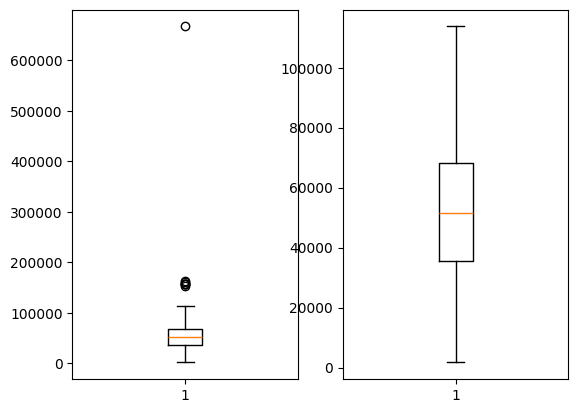

In [48]:
print(''' 
이상치를 제거하는 방법은 크게 두 가지가 많이 사용된다.
      1. IQR(Inter-Quartile Range) 방법
        IQR(값 크기 상 75% 위치값과 25% 위치값의 차)를 기반으로 (25% 위치값 - 1.5*IQR) ~ (75% 위치값 + 1.5*IQR) 로 정상범위를 정하는 것이다.
      2. 표준편차 방법
        +/- 3*표준편차 범위를 정상범위로 정하는 것이다.
''')
import matplotlib.pyplot as plt

income_before = data.Income
income_after = data[np.abs(zscore(data.Income))<3].Income

fig, ax = plt.subplots(1, 2)
ax[0].boxplot(income_before)
ax[1].boxplot(income_after)
plt.show()

In [49]:
print(data[np.abs(zscore(data.Income)) > 3].Income)

print('''
      결측치의 경우 아래 보는 바와 같이 index 2233의 666666 만 이상치로 보여진다.
      해당 데이터만 삭제한다.
''')
data.drop(index=[2233], inplace=True)

print(data[np.abs(zscore(data.Income)) > 3].Income)

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

      결측치의 경우 아래 보는 바와 같이 index 2233의 666666 만 이상치로 보여진다.
      해당 데이터만 삭제한다.

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
Name: Income, dtype: float64


# 1-3. 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하세요.

### 추가 전처리 군집분석을 하기 위해서는 범주형 변수 Marital_Status 인코딩 필요 

In [50]:
data1 = pd.get_dummies(data, drop_first=True)

최적의 클러스터 개수를 결정하는데 사용되는 방법 (2)   
* 엘보우 기법
    - 클러스터 내 오차제곱합(SSE)을 클러스터 개수마다 비교
    - 클러스터 개수를 늘려나가면서 계산한 SSE를 비교
    - 어느 순간 줄어드는 비율이 급격하게 작아지는 부분이 생김 (=팔꿈치, eblow)
    - 그 부분이 최적의 클러스터 개수임


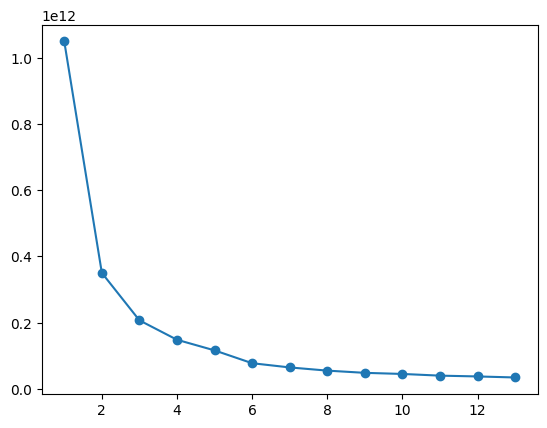

위 Scree plot에서 보는 바와 같이 6개의 cluster가 유효할 것으로 보인다.



In [51]:
from sklearn.cluster import KMeans

errsum = []
for i in range(1,14):
    km = KMeans(n_init='auto', n_clusters=i).fit(data1)
    errsum.append(km.inertia_)

plt.plot(list(range(1,14)), errsum, marker='o')
plt.show()

print('''위 Scree plot에서 보는 바와 같이 6개의 cluster가 유효할 것으로 보인다.
''')

### K-Means 군집 분석

In [58]:
km = KMeans(n_init='auto', n_clusters=4).fit(data1)


# 2. 군집분석

### 2-1.위에서 생성한 군집들의 특성을 분석하세요. 

In [93]:
data['cluster'] = km.labels_
data1['cluster'] = km.labels_

grouped = data1.groupby('cluster').mean().sort_values(by='Income', ascending=False)

print(''' 
그룹1은 수입이 상위권이면서 아이가 적은 가정으로 와인이나 과일, 고기 등 모든 분야에서 지출이 최상위이다.
그룹3은 수입이 중상위이면서 나이가 많고 10대 아이들이 많은 가정으로, 지출 역시 중상위에 속한다.
그룹0은 수입이 중위권이면서 아이가 많은 편에 속하는 가정으로 지출이 크지 않고, 인터넷 쇼핑이 많은 편이다.
그룹2는 수입이 하위권이고 나이가 적고 지출 수준이 가장 낮다. 나이도 적어 가정에 어린아이가 많다.
''')
grouped

 
그룹1은 수입이 상위권이면서 아이가 적은 가정으로 와인이나 과일, 고기 등 모든 분야에서 지출이 최상위이다.
그룹3은 수입이 중상위이면서 나이가 많고 10대 아이들이 많은 가정으로, 지출 역시 중상위에 속한다.
그룹0은 수입이 중위권이면서 아이가 많은 편에 속하는 가정으로 지출이 크지 않고, 인터넷 쇼핑이 많은 편이다.
그룹2는 수입이 하위권이고 나이가 적고 지출 수준이 가장 낮다. 나이도 적어 가정에 어린아이가 많다.



,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
cluster,,,,,,,,,,,,,,,,,,,,,
1,5590.873418,1967.848101,82990.162025,0.073418,0.235443,659.706329,64.422785,471.200000,91.951899,67.741772,...,6.065823,8.245570,2.675949,0.000000,0.093671,0.377215,0.225316,0.263291,0.037975,0.000000
3,5680.541284,1965.882263,63427.415902,0.188073,0.709480,482.692661,37.426606,213.711009,51.287462,37.006116,...,3.775229,8.041284,4.558104,0.001529,0.117737,0.400612,0.178899,0.256881,0.042813,0.000000
0,5387.341534,1968.276411,43487.211335,0.646889,0.670043,137.318379,8.839363,53.787265,14.515195,9.817656,...,1.256151,4.316932,6.301013,0.002894,0.105644,0.370478,0.224313,0.259045,0.034732,0.002894
2,5753.274549,1974.112224,24158.056112,0.791583,0.228457,19.348697,5.753507,21.827655,8.328657,5.763527,...,0.458918,2.941884,7.036072,0.000000,0.090180,0.394790,0.238477,0.256513,0.020040,0.000000


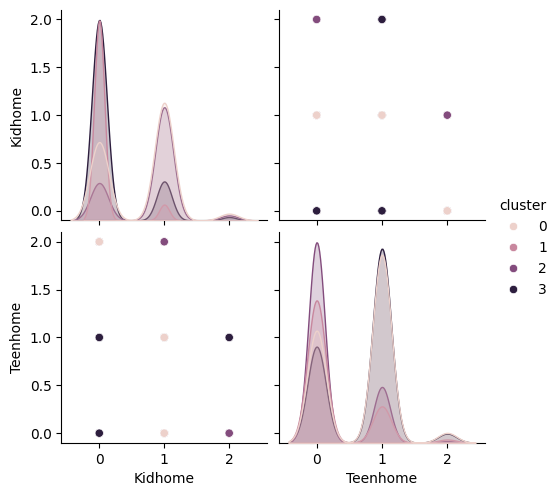

In [86]:
data_num = data1.select_dtypes(include=['int', 'float'])

col_fam = ['Kidhome','Teenhome']
col_prod = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts',	'MntSweetProducts']
col_cons = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',	'NumStorePurchases','NumWebVisitsMonth']

import seaborn as sns

col_fam.append('cluster')
sns.pairplot(data1[col_fam], hue='cluster')

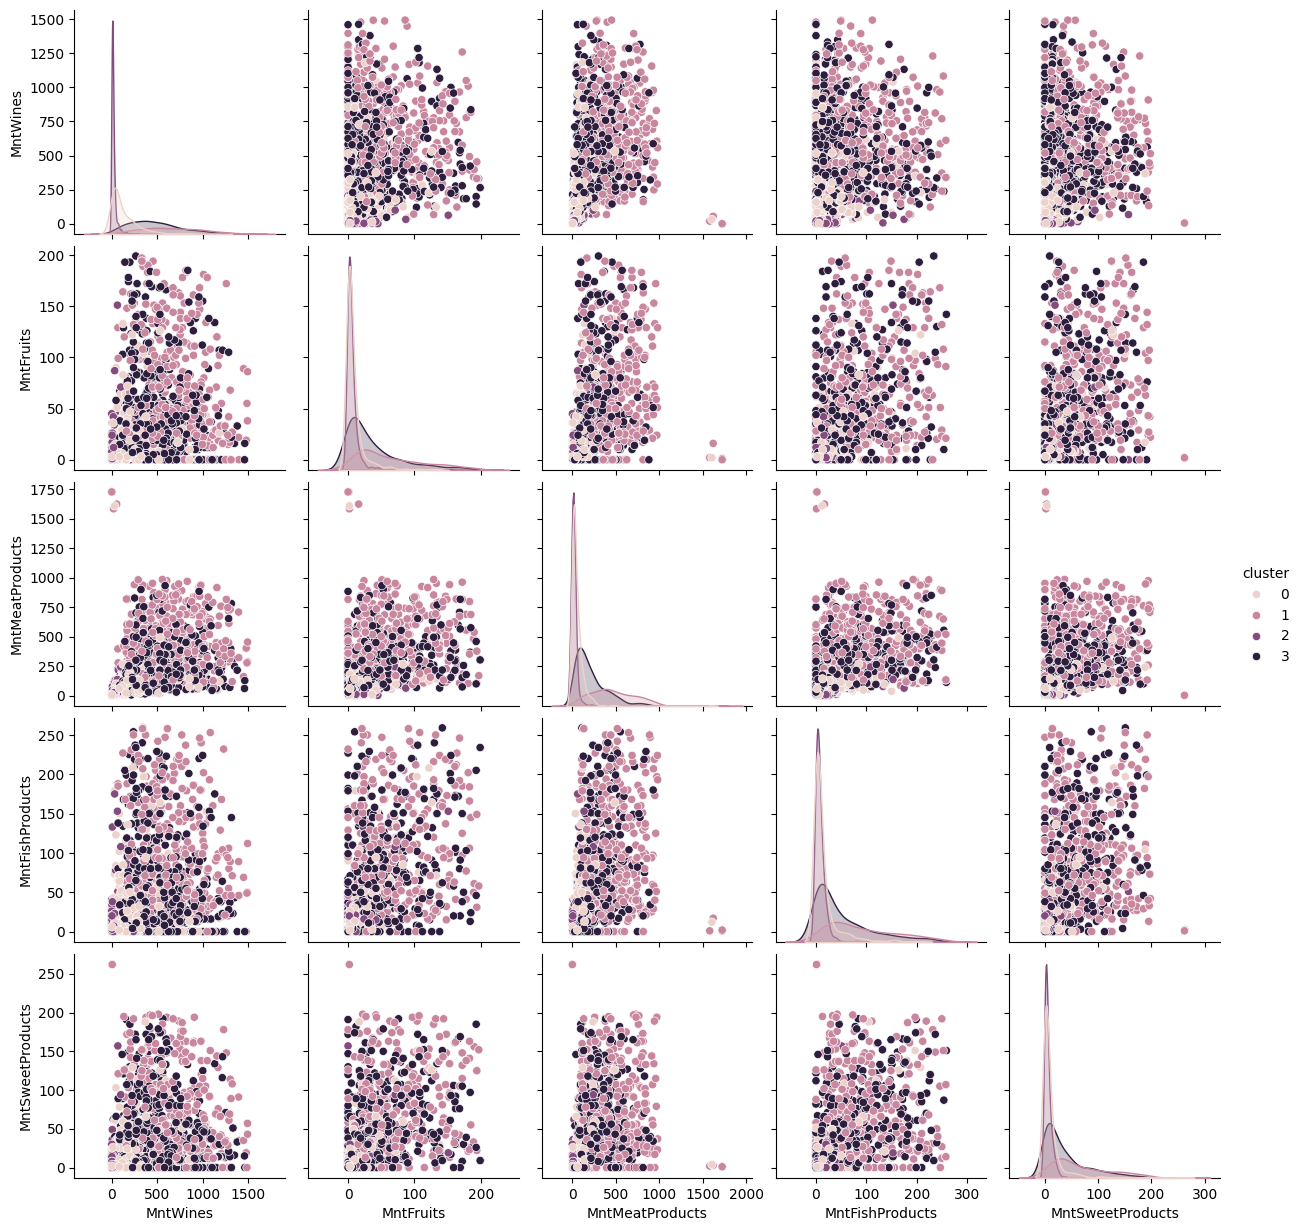

In [87]:
col_prod.append('cluster')
sns.pairplot(data1[col_prod], hue='cluster')

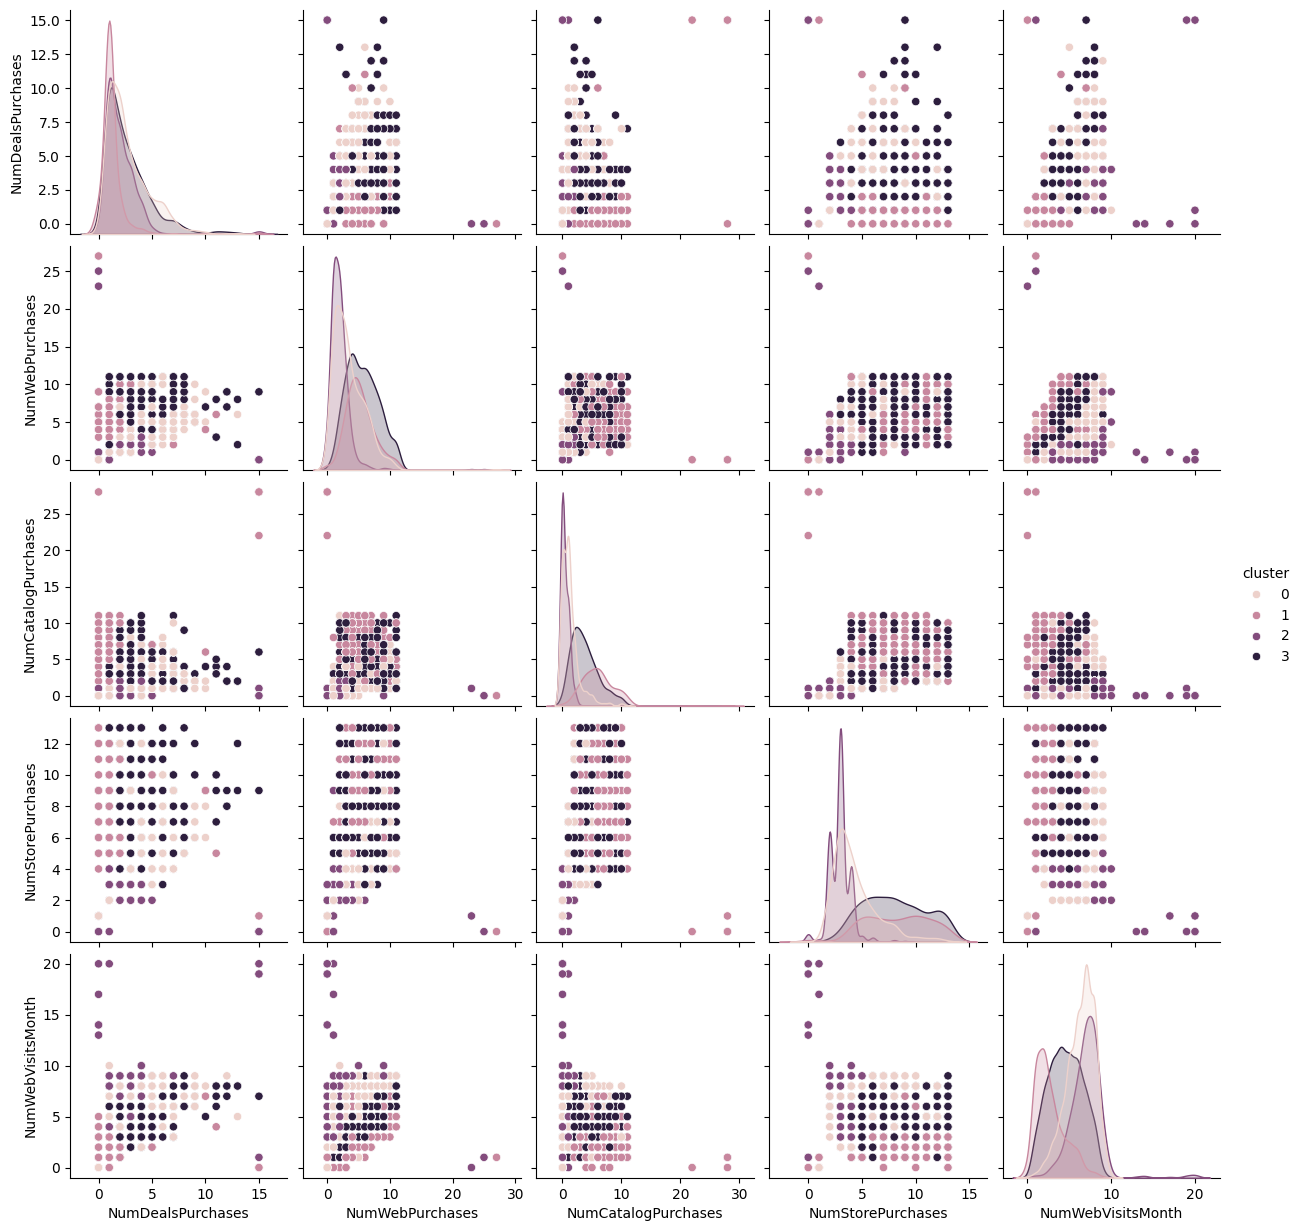

In [88]:
col_cons.append('cluster')
sns.pairplot(data1[col_cons], hue='cluster')

In [90]:
data1[data1.ID==10870]

,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster
2235,10870,1967,61223.0,0,1,709,43,182,42,118,...,4,5,False,False,True,False,False,False,False,3


### 2-2. 위에서 생성한 군집들의 특성을 분석하세요.

## A. 소비특징 
1. 0번 그룹 : 평균연령 1967년생, 소득이 가장 많은 집단으로 전체 구매 수 1214로 가장 높고 그 중 와인의 구매가 가장 많고,  타 그룹과 비율로 보았을 때 Wine 의 비율이 높다. 
<br><br>
2. 1번 그룹 : 가장 어린 집단(평균 1973년생) 소득의 평균도 낮고, 소비가 가장 적은 집단이다. 전체 구매 수가 77로 가 현저히 낮으며 소비의 타 그룹가 비교하였을 때, 비율에서는 고기와 과자, 과일의 비율이 가장 높다. / 전체적인 소비보다는 특정 상품의 소비의 비율이 높다 
<br><br>
3. 2번 그룹 : 소득과 소비가 중간이다. 타 그룹과 비교하였을 때, 와인의 구매비율이 0.638로 가장 높다. 

# 2번 정답
## 0번 그룹 : 와인 
## 1번 그룹 : 고기 
## 2번 그룹 : 와인 

## B. 마케팅 특징 
1. 0번 그룹 : Store에서 직접 구매하는 비율이 가장 높다 , 다른 그룹보다 카탈로그를 많이 이용하는 편이다, 할인은 신경 안쓰는편 

2. 1번 그룹 : 지난 달에는 웹사이트에서 구매하는 비율이 가장 높았으나, 이번달에는 홈페이지 구매가 낮아졌다. 원인 파악이 필요. <br> 
              이번 달에는 오히려 웹사이트보다는 직접 매장에서 구매하였다. 

3. 2번 그룹 : 웹, 매장의 비중이 비슷하다. 하지만 카탈로그로 구매하는 비율이 가장 적으므로 해당 그룹에는 카탈로그보다는 웹, 매장 홍보가 필요하다. 

* NumDealsPurchases : 할인된 상품  구매 횟수 
* NumWebPurchases: 회사 웹사이트를 통해 이루어진 구매 수
* NumCatalogPurchases: 카탈로그를 사용하여 이루어진 구매 수
* NumStorePurchases: 매장에서 직접 구매한 횟수
* NumWebVisitsMonth: 지난 달 회사 웹 사이트 방문 횟수

### 2-3. ID가 10870인 고객을 대상으로 상품을 추천하세요.

In [ ]:
data.loc[data["ID"]==10870]

,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
2235,10870,1967,61223.0,0,1,709,43,182,42,118,...,3,4,5,False,False,True,False,False,False,False


1. 10870 고객은 2번집단이다. 와인의 구매비율이 높은 집단으로 와인 상품을 추천하는 것이 소비비율의 특징을 보았을 때 적절하다고 판단된다. 
2. 2번 집단의 특성상, 웹, 매장에서 구매하는 비율이 높았다. 해당 고객은 지난달 구매수와 이번달 구매 수를 보니 웹사이트를 많이 이용하는 고객으로 보이므로 웹사이트 추천을 하는 것이 좋아보인다. 